In [2]:
##import necessary modules

%matplotlib inline

import os
import csv
import json
import rdflib
import glob
import requests
import visJS2jupyter.visJS_module
import zipfile
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from rdflib import Graph

from arcgis.gis import GIS

In [3]:
docsPath = r'C:\Users\jame9353\Documents\GitHub\NLP-Engine-Integration\Demo Data\Jupyter Notebook Data'
rdfOutDir = r'C:\Data\RDF'
rdfOutExt = ".rdf"
fileOutDir = r'C:\Users\jame9353\Documents\GitHub\RDFtoNeo4J\Data'

In [4]:
#Walks through the docsPath, identifying files, and appends them to a list.
docs = []
for root, dirs, files in os.walk(docsPath):
    for f in files:
        filePath = os.path.join(root, f)
        docs.append(filePath)

In [5]:
#Defines a function that will pass documents derived from the list
# above to the NetOwl API.  
#Function checks the type of document and makes necessary adjustment 
# to the POST command.
#Function has three inputs:
#    1.  inFile:  This is the file that will be passed to the NetOwl API
#    2.  outPath: Path where the output file will be saved
#    3.  outExtension:  the file type that will be saved (RDF, etc..)

def netowlCurl(inFile, outPath, outExtension):
    headers = {
    'accept': 'application/rdf+xml',
    'Authorization': 'netowl ff5e6185-5d63-459b-9765-4ebb905affc8',
    }
    
    if inFile.endswith(".txt"):
        headers['Content-Type'] = 'application/msword'
        print("Document is a text file...")
    elif inFile.endswith(".pdf"):
        headers['Content-Type'] = 'application/pdf'
        print("Document is a PDF...")
    elif inFile.endswith(".docx"):
        headers['Content-Type'] = 'application/msword'
        print("Document is a Word Document...")
    
    params = (
        ('language', 'english'),
    )
    
    data = open(inFile, 'rb').read()
    response = requests.post('https://api.netowl.com/api/v2/_process', headers=headers, params=params, data=data, verify=False)
    r = response.text
    outPath = outPath
    fileName = os.path.split(d)[1]
    if os.path.exists(outPath) == False:
        os.mkdir(outPath, mode=0o777,)
    outFile = os.path.join(outPath, fileName + outExtension)
    open(outFile, "w", encoding="utf-8").write(r)

In [6]:
#Iterates though the docs list created previously and 
# runs the function for each of the documents found. 
#Passes the function a document derived from the list,
# and two variables created in a previous step. 

for d in docs:
    netowlCurl(d, rdfOutDir, rdfOutExt)

Document is a Word Document...


c:\users\jame9353\appdata\local\esri\conda\envs\networkanalysis\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Document is a Word Document...
Document is a Word Document...
Document is a Word Document...


c:\users\jame9353\appdata\local\esri\conda\envs\networkanalysis\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\jame9353\appdata\local\esri\conda\envs\networkanalysis\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\jame9353\appdata\local\esri\conda\envs\networkanalysis\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarn

Document is a Word Document...
Document is a Word Document...
Document is a Word Document...


c:\users\jame9353\appdata\local\esri\conda\envs\networkanalysis\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\jame9353\appdata\local\esri\conda\envs\networkanalysis\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\jame9353\appdata\local\esri\conda\envs\networkanalysis\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarn

In [7]:
#Creates a Graph Object that will store all the result of a parse operation 
# in the next step. 
g = Graph()

In [8]:
#Walks through output path from the netowlCurl function and parses all RDF/XML Documents
for root, dir, files in os.walk(rdfOutDir):
    for file in files:
        if file.endswith('.rdf'):
            filePath = os.path.join(root, file)
            print("Parsing " + file + "...")
            try:
                g.parse(filePath, format='xml')
            except Exception as ex:
                print(ex) 

Parsing 050316TF029.docx.rdf...
Parsing 050316TF030.docx.rdf...
Parsing 050316TF035.docx.rdf...
Parsing 050316TF055.docx.rdf...
Parsing 050416NA002.docx.rdf...
Parsing 050416NA005.docx.rdf...
Parsing 050416NA016.docx.rdf...
Parsing 190200ZFEB13_SCTY_ATS3_ISAF_HELICOPTER_ATTACK_IN_KUNAR_UPSET_VILLAGERS.docx.rdf...
Parsing 190205ZFEB13_SCTY_ATS3_ELDERS_IN_SAIDON_SUPPORT_ZANGABAD_VILLAGERS_FIGHT_AGAINST_TALIBAN.docx.rdf...
Parsing 190210ZFEB13_SCTY_ATS3_VILLAGERS_CLAIM_GIROA_HIRED_A_TALIBAN_FIGHTER_TO_BE_AN_ALP.docx.rdf...
Parsing 190215ZFEB13_GOV_ATS3_VILLAGERS_WANT_GIROA_TO_STOP_HIRING_UNDERAGED_ALP.docx.rdf...
Parsing 190220ZFEB13_GOV_ATS3_VILLAGERS_WANT_THE_ALP_MONITORED_FOR_ILLEGAL_ACTIVITY.docx.rdf...
Parsing 190225ZFEB13_TRANS_ATS3_RESIDENTS_WANT_ISAF_TO_STAY_UNTIL_2015_PRESIDENTIAL_ELECTIONS.docx.rdf...
Parsing 190230ZFEB13_GOV_ATS3_ALL_CHILDREN_IN_ZHARAY_NEED_TO_GET_POLIO_VACCINATION.docx.rdf...
Parsing 1902340ZFEB13_THREAT_ATS3_KELIWAL_VILLAGER_IS_INJURED_BY_A_TALIBAN_MINE.docx.

Parsing 200820ZFEB13_SCTY_ATS4_TALIBAN_PREPARE_FOR_SUMMER_FIGHTING_SEASON.docx.rdf...
Parsing 200825ZFEB13_GOV_ATS4_AFGHAN_PARLIAMENT_MEMBER_ACCUSED_OF_SUPPORTING_TALIBAN.docx.rdf...
Parsing 200830ZFEB13_GOV_ATS7_LOCAL_VILLAGERS_DISCUSS_AFGHAN_PRESIDENTIAL_CANDIDATES.docx.rdf...
Parsing 200830ZFEB13_SCTY_ATS4_SOME_TALIBAN_SEE_SUCCESS_IN_ISAF_EFFORTS.docx.rdf...
Parsing 200835ZFEB13_CRIME_ATS4_CRIME_SPREE_CONTINUES_IN_QALAT.docx.rdf...
Parsing 210200ZFEB13_INFRA_ATS3_SHOPKEEPERS_WANT_PUBLIC_BATHROOMS_FOR_THEIR_BAZAAR.docx.rdf...
Parsing 210205ZFEB13_GOV_ATS3_VILLAGERS_WANT_CHANGES_TO_THE_TAZKERA_DEPARTMENT.docx.rdf...
Parsing 210210ZFEB13_SCTY_ATS3_VILLAGERS_APPRECIATE_THE_HARD_WORK_OF_ALP_COMMANDER_HAJI_LALA.docx.rdf...
Parsing 210215ZFEB13_INFRA_ATS3_VILLAGERS_APPRECIATE_THE_USAID_CLASS_OFFERED_AT_THE_DISTRICT_CENTER.docx.rdf...
Parsing 210220ZFEB13_CRIME_ATS3_DGOV_SARHADI_ATTENDS_LOCAL_SHURAS_TO_SPREAD_AN_ANTI-POPPY_MESSAGE.docx.rdf...
Parsing 210225ZFEB13_THREAT_ATS3_VILLAGERS_HAPPY

In [11]:
#Uses the SPARQL endpoint to query all of the relationship types and returns the top 10
properties=g.query("""
   SELECT ?p (COUNT(*) AS ?cnt) {
      ?s ?p ?o .
   } GROUP BY ?p ORDER BY DESC(?cnt)
""")

properties_list =[]

for s,p in properties:
    clean_subject = s.split("#")[1]
    properties_list.append([clean_subject, int(p)])
    
properties_df = pd.DataFrame(properties_list, columns=['Type', 'Count'])
properties_df

,Type,Count
0,type,2231
1,label,2146
2,Entity.Time.Age..name,356
3,Entity.Place.City..name,296
4,Entity.Place.City..fips_10_4_country,271
5,Entity.Place.City..country,271
6,Entity.Place.City..iso_3166_1_country,271
7,Entity.Place.City..latitude,270
8,Entity.Place.City..longitude,270
9,Entity.Place.City..geocode_confidence,270


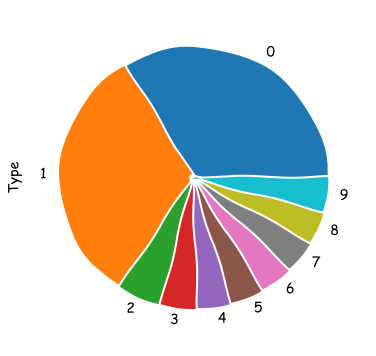

In [19]:
#Graphs the top 10 relationship types
with plt.xkcd():
    properties_df.head(10)["Count"].plot.pie(figsize=(6,6)).set_ylabel('Type')

In [ ]:
#Writes the full relationship types data frame to a CSV document
file_name = os.path.join(fileOutDir, 'predicates.csv') 
properties.to_csv(file_name, sep=',', encoding='utf-8')

In [ ]:
#SPARQL query to identify various entity types inside of the graph
pd.set_option("display.width",150)
pd.set_option("display.max_colwidth",150)
sparql=e.select("""
   SELECT ?s ?o ?label{
      ?s netowl:Entity.Person..name ?o .
      ?s rdfs:label ?label .
    }
""")
sparql.set_index("label")

In [ ]:
#Queries the SPARQL endpoint for the various addresses located in the documents
address=e.select("""
   SELECT ?s ?o ?label{
      ?s netowl:Entity.Address.Mail..name ?o .
      ?s rdfs:label ?label .
    }
""")
address.set_index("label")
#address_file = r'C:\Users\jame9353\Documents\GitHub\RDFtoNeo4J\Data\addresses.csv'
#address.to_csv(address_file, sep=',', encoding='utf-8')

In [ ]:
#Makes a connection to ArcGIS Online and adds a map widget centered over Baltimore, MD
gis = GIS("https://esrifederal.maps.arcgis.com", client_id = "Sama2eyhY8UFPwQb")
map = gis.map("Baltimore")
map

In [ ]:
#Geocodes the addresses and adds them to the map widget as a feature collection
locations = gis.content.import_data(address, {"Address" : "o"})
map.add_layer(locations)

In [ ]:
#Creates a hosted feature service from the feature 
# collection created in the previous step
loc_properties = {
    "title":"NetOwl_Addresses",
    "text": json.dumps({"featureCollection": {"layers": [dict(locations.layer)]}}),
    "type":"Feature Collection"}
loc = gis.content.add(loc_properties)

In [ ]:
#Queries for the MGRS coordinates and writes them to a CSV file
mgrs=e.select("""
   SELECT ?s ?o ?label{
      ?s netowl:Entity.Numeric.Coordinate.Mgrs..name ?o .
      ?s rdfs:label ?label .
    }
""")
mgrs.set_index("o")
mgrs_file = os.path.join(fileOutDir,'mgrs_coords.csv')
mgrs.to_csv(mgrs_file, sep=',', encoding='utf-8')

In [ ]:
#Converts coordinates located in the MGRS CSV into Lat/Longs, turns this into a shapefile
outShpDir = os.path.join(fileOutDir, 'OutShp')
if os.path.exists(outShpDir) == False:
    os.mkdir(outShpDir, mode=0o777,)
arcpy.ConvertCoordinateNotation_management(in_table=mgrs_file, out_featureclass=os.path.join(outShpDir,"NetOwl_MGRS.shp"), x_field="o", y_field="o", input_coordinate_format="MGRS", output_coordinate_format="DD_NUMERIC", id_field="", spatial_reference="GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]];-400 -400 1000000000;-100000 10000;-100000 10000;8.98315284119522E-09;0.001;0.001;IsHighPrecision", in_coor_system="GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", exclude_invalid_records="INCLUDE_INVALID")

In [ ]:
#Zips up the shapefile created in the previous step

outZip = fileOutDir

def zipShapefilesInDir(inDir, outDir):
    if not os.path.exists(inDir):
        arcpy.AddMessage("Input directory %s does not exist!" % inDir)
        return False

    if not os.path.exists(outDir):
        arcpy.AddMessage("Creating output directory %s" % outDir)
        os.mkdir(outDir)

    arcpy.AddMessage("Zipping shapefile(s) in folder %s to output folder %s" % (inDir, outDir))

    for inShp in glob.glob(os.path.join(inDir, "*.shp")):
        global outZip
        outZip = os.path.join(outDir, os.path.splitext(os.path.basename(inShp))[0] + ".zip")

        zipShapefile(inShp, outZip)
    return True


def zipShapefile(inShapefile, newZipFN):
    arcpy.AddMessage('Starting to Zip ' + (inShapefile) + ' to ' + (newZipFN))

    if not (os.path.exists(inShapefile)):
        arcpy.AddMessage(inShapefile + ' Does Not Exist')
        return False

    if (os.path.exists(newZipFN)):
        arcpy.AddMessage('Deleting ' + newZipFN)
        os.remove(newZipFN)

    if (os.path.exists(newZipFN)):
        arcpy.AddMessage('Unable to Delete' + newZipFN)
        return False

    zipobj = zipfile.ZipFile(newZipFN, 'w')

    for infile in glob.glob(inShapefile.lower().replace(".shp", ".*")):
        if os.path.splitext(infile)[1].lower() != ".zip":
            arcpy.AddMessage("Zipping %s" % (infile))
            zipobj.write(infile, os.path.basename(infile), zipfile.ZIP_DEFLATED)

    zipobj.close()
    return True

zipShapefilesInDir(outShpDir, fileOutDir)

In [ ]:
#Uploads the shapefile to ArcGIS Online and publishes it as a feature service
tempItem = gis.content.add({"title":"NetOwl_MGRS", "type":"Shapefile"}, outZip)
mgrsLyr = tempItem.publish()

In [ ]:
#Adds a map widget centered over Iraq
map1 = gis.map()
map1

In [ ]:
#Searches for the feature service created from the MGRS Coordinates and adds it to the map widget
mgrsData = gis.content.search("NetOwl_MGRS", item_type="feature service")[0]
mgrsData
map1.add_layer(mgrsData)

In [ ]:
#Queries for the Lat/Long coordinates located in the document
latlong=e.select("""
   SELECT ?s ?o ?label{
      ?s netowl:Entity.Numeric.Coordinate.Latlong..name ?o .
      ?s rdfs:label ?label .
    }
""")
latlong.set_index("label")

In [ ]:
#Queries for the Lat/Long coordinates located in the document
city=e.select("""
   SELECT ?s ?o ?label{
      ?s netowl:Entity.Place.City..name ?o .
      ?s rdfs:label ?label .
    }
""")
city.set_index("o")

city = gis.content.import_data(city, {"City" : "o"})

In [ ]:
map2 = gis.map()
map2

In [ ]:
map2.add_layer(city)

In [ ]:
city_properties = {
    "title":"NetOwl_Cities",
    "text": json.dumps({"featureCollection": {"layers": [dict(city.layer)]}}),
    "type":"Feature Collection"}
loc = gis.content.add(city_properties)

In [ ]:
#Creates a NetworkX Graph for visualization
nxG = nx.Graph()

In [ ]:
#Queries the SPARQL endpoint and generates a list of the edges to be used in the Graph
edgeGraph=e.select("""
   SELECT ?labelO ?labelS{
      ?s ?p ?o .
      ?o rdfs:label ?labelO .
      ?s rdfs:label ?labelS .
    }
""")
edgeGraph.set_index("labelS")

#Adds edges to NetworkX Graph
for i, elrow in edgeGraph.iterrows():
    nxG.add_edge(elrow[0], elrow[1], attr_dict=elrow[1:].to_dict())

In [ ]:
nodes = list(nxG.nodes()) # must cast to list to maintain compatibility between nx 1.11 and 2.0
edges = list(nxG.edges()) 

pos = nx.spring_layout(nxG)
nodes_dict = [{"id":n,
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000} for n in nodes]

node_map = dict(zip(nodes,range(len(nodes))))

edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "title":'test'} for i in range(len(edges))]

visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict)